In [15]:
from PIL import Image
import cv2
from os.path import join
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

BBox = namedtuple('BBox', ['a','b','c','d','e','f','g','h'])
Point = namedtuple('Point', ['x','y'])

In [16]:
img_path = '/Users/zal/CMU/Projects/DIVA/Vehicle_Action_Classifier/output/3dBBox_example.png'
a = Point(932, 528)
b = Point(1006, 571)
c = Point(1006, 654)
d = Point(932, 612)
e = Point(1108, 429)
f = Point(1184, 468)
g = Point(1184, 550)
h = Point(1108, 533)

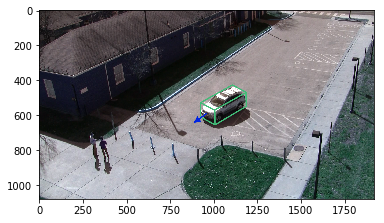

In [17]:
car_img = cv2.imread(img_path)
plt.imshow(car_img)

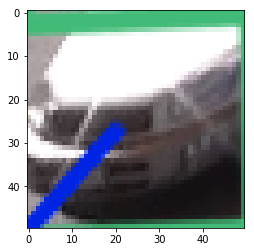

In [46]:
front_pts = np.float32([[a.x, a.y], [b.x, b.y], [c.x, c.y], [d.x, d.y]])
front_warp_pts = np.float32([[0, 0], [50, 0], [50, 50], [0, 50]])

M = cv2.getPerspectiveTransform(front_pts, front_warp_pts)

# warp image with M
front = cv2.warpPerspective(car_img, M, (50, 50))
front = Image.fromarray(front)
# show the image
plt.imshow(front)

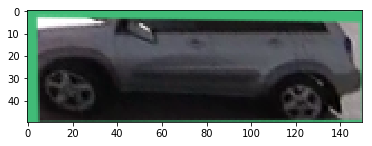

In [45]:
side_pts = np.float32([[b.x, b.y], [f.x, f.y], [g.x, g.y], [c.x, c.y]])
side_warp_pts = np.float32([[0, 0], [150, 0], [150, 50], [0, 50]])

M = cv2.getPerspectiveTransform(side_pts, side_warp_pts)

# warp image with M
side = cv2.warpPerspective(car_img, M, (150, 50))
side = Image.fromarray(side)
# show the image
plt.imshow(side)

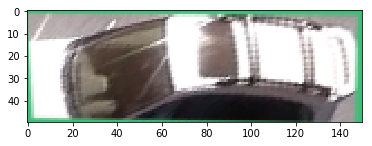

In [47]:
top_pts = np.float32([[a.x, a.y], [e.x, e.y], [f.x, f.y], [b.x, b.y]])
top_warp_pts = np.float32([[0, 0], [150, 0], [150, 50], [0, 50]])

M = cv2.getPerspectiveTransform(top_pts, top_warp_pts)

# warp image with M
top = cv2.warpPerspective(car_img, M, (150, 50))
top = Image.fromarray(top)
# show the image
plt.imshow(top)

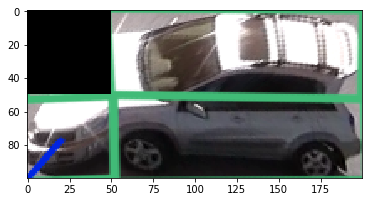

In [51]:
unwrapped_img = Image.new('RGB', (200, 100))
unwrapped_img.paste(front, (0, 50))
unwrapped_img.paste(top, (50,0))
unwrapped_img.paste(side, (50,50))
plt.imshow(unwrapped_img)

In [52]:
unwrapped_img.save('/Users/zal/CMU/Projects/DIVA/Vehicle_Action_Classifier/output/unwrapped_car.jpg')